In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/harmful-speech/CT22_arabic_1C_harmful_dev.tsv
/kaggle/input/harmful-speech/CT22_arabic_1C_harmful_dev_test.tsv
/kaggle/input/harmful-speech/CT22_arabic_1C_harmful_train.tsv


In [2]:
train=pd.read_csv('../input/harmful-speech/CT22_arabic_1C_harmful_train.tsv',sep='\t')
test=pd.read_csv('../input/harmful-speech/CT22_arabic_1C_harmful_dev_test.tsv',sep='\t')
dev=pd.read_csv('../input/harmful-speech/CT22_arabic_1C_harmful_dev.tsv',sep='\t')

In [3]:
print(len(train),len(test),len(dev))

3624 994 336


In [4]:
dev.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1366750293535444997,http://twitter.com/user/status/136675029353544...,الصحة: من تلقى لقاح كورونا وتجاوز بعد استكمال ...,0
1,COVID-19,1296280796131721217,http://twitter.com/user/status/129628079613172...,تصريح صادم من «الصحة العالمية»: لا يوجد لقاح ل...,1
2,COVID-19,1293111922326409216,http://twitter.com/user/status/129311192232640...,🔴بوتين يعلن عن تسجيل أول #لقاح ضد #فيروس_كورون...,0
3,COVID-19,1290288058617589761,http://twitter.com/user/status/129028805861758...,#روسيا تعد بتوفير ملايين الجرعات من لقاح #كورو...,0
4,COVID-19,1367487744323301386,http://twitter.com/user/status/136748774432330...,@SaudiMOH والدتي مصابه بتليف جزئي في الرئه وسك...,0


In [5]:
test.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1.367532e+18,http://twitter.com/user/status/136753224626623...,دخلت اسجل لقاح بمستشفى الجامعه وبيومين صار كل ...,0
1,COVID-19,1.297940e+18,http://twitter.com/user/status/129794009092531...,تعرّف على أول دولة ستحصل على اللقاح الروسي ضد ...,0
2,COVID-19,1.294701e+18,http://twitter.com/user/status/129470128763696...,البروفيسورة سارة جيلبرت قائدة فريق العمل في لق...,0
3,COVID-19,1.295658e+18,http://twitter.com/user/status/129565789215520...,#الصين :اللقاح المضاد ل #فيروس_كورونا سيكون مت...,0
4,COVID-19,1.293537e+18,http://twitter.com/user/status/129353728218048...,وزير الصحة الروسى: تطعيم الأطباء بلقاح #كورونا...,0


In [6]:
train.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1.297845e+18,http://twitter.com/user/status/129784491603128...,الحكومة البرازيلية @jairbolsonaro توقع اتفاقية...,0
1,COVID-19,1.241050e+18,http://twitter.com/user/status/124105023091052...,غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا...,1
2,COVID-19,1.366702e+18,http://twitter.com/user/status/136670236419181...,https://t.co/nmy4E7GBBu تبلغ سعة مستشفى الأمير...,0
3,COVID-19,1.293905e+18,http://twitter.com/user/status/129390484305719...,"الكيميتريل اللي بيترش لقاح فيروس كورونا وحـ,,ـ...",1
4,COVID-19,1.293258e+18,http://twitter.com/user/status/129325812550884...,قال روسيا اعلنت عن لقاح مشان فيروس كورونا 🤔 حد...,1


In [7]:
train.drop(['tweet_url'],axis=1,inplace=True)
test.drop(['tweet_url'],axis=1,inplace=True)
dev.drop(['tweet_url'],axis=1,inplace=True)

In [8]:
train[train.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


In [9]:
test[test.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


In [10]:
dev[dev.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


<AxesSubplot:xlabel='class_label', ylabel='count'>

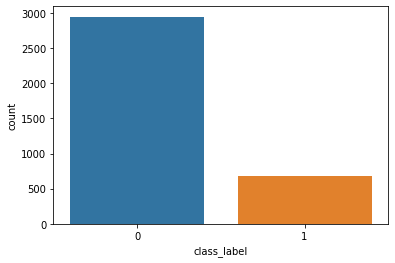

In [11]:
import seaborn as sns
sns.countplot(x='class_label', data=train)

In [12]:
i=5
print(train['tweet_text'][i]) 
print('________________________')
print(train['class_label'][i])

Bill Gates التقني الذي تحول إلى فاعل خير في مجال اللقاحات .. ما بين رأي من يراه أحد أكثر الشخصيات مصداقية لقيام مؤسسته باستثمارات ضخمة في اللقاحات والعلاجات والاختبارات وبين رأي من اتهمه بالتخطيط لحقن الرقائق الدقيقة في متلقي اللقاح 🤔 https://t.co/kLsA9Rjxoq
________________________
1


In [13]:
i=157
print(train['tweet_text'][i]) 
print('________________________')
print(train['class_label'][i])

متحدث #الصحة: لا يمكن لمن أخذ اللقاح مخالطة المصابين فهذا الأمر خطير وقد يعرضه للمخاطر https://t.co/x0zIsDCZiJ #وزارة_الصحة #فيروس_كورونا #لقاح_كورونا https://t.co/7QfwEMtUaH
________________________
1


In [14]:
i=0
print(train['tweet_text'][i]) 
print('________________________')
print(train['class_label'][i])

الحكومة البرازيلية @jairbolsonaro توقع اتفاقية مع استرازينيكا @AstraZeneca لنقل التكنلوجيا و تصنيع تطعيم 💉AZD1222 (تطعيم أوكسفورد) الاتفاقية ضمنت للبرازيل حق تصنيع💉100مليون جرعة، و مستقبل صناعة دوائية 🗓متوقع بداية تصنيع التطعيم في ديسمبر2020 https://t.co/uIzOQY3782 (277) https://t.co/9zgjx1vUDe
________________________
0


In [15]:
i=70
print(train['tweet_text'][i]) 
print('________________________')
print(train['class_label'][i])

النتائج المبكرة من الدراسة تشير إلى أن الأفراد المصابين بعدوى كوفيد ١٩ سابقة يولدون استجابة مناعية أقوى للجرعة الأولى من لقاح فايزر مقارنة بالأفراد غير المصابين سابقًا https://t.co/w4Uotg7Af3
________________________
0


Data preprocessing

In [16]:
!pip install pyarabic
!pip install farasapy
!pip install tashaphyne

     |████████████████████████████████| 251 kB 787 kB/s            


In [17]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import tashaphyne.arabic_const as arabconst 
import pyarabic.araby as araby

In [18]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


In [19]:
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)


In [20]:
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

In [21]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [22]:
def remove_alphas(text):
    # Removes any link in the text
      text = re.sub('_', ' ', text)
      text = re.sub('،', '', text)
      text = re.sub('[A-Za-z0-9]','',text)
      return text

In [23]:
test3=train['tweet_text'][4]
test4=train['tweet_text'][1]
print(test3)
print(test4)

قال روسيا اعلنت عن لقاح مشان فيروس كورونا 🤔 حدا بيصدق المجرم بوتين !!؟؟
غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا    #حكومه_قطر_تنشر_كورونا https://t.co/B3Bxg7i4zR


In [24]:
data=pd.concat([train,dev,test])

In [25]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [26]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [27]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [28]:
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_alphas(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_URL(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_html(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_special_characters(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_stop_words(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:normalizeArabic(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:stem(x))

In [29]:
from sklearn.model_selection import train_test_split
X = data.tweet_text.values
y = data.class_label.values

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15,shuffle=True, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.15,shuffle=True, random_state=42)

In [31]:
X_train = train.tweet_text.values
y_train = train.class_label.values

X_test = test.tweet_text.values
y_test=test.class_label.values

X_val=dev.tweet_text.values
y_val=dev.class_label.values

In [32]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel

In [33]:
tokenizer = BertTokenizerFast.from_pretrained('aubmindlab/bert-base-arabertv01')


Downloading:   0%|          | 0.00/762k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/576 [00:00<?, ?B/s]

In [34]:
token_lens_test = []

for txt in train['tweet_text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [35]:
MAX_LEN=150


In [36]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [37]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [38]:
bert_model = TFBertModel.from_pretrained('aubmindlab/bert-base-arabertv01')


Downloading:   0%|          | 0.00/708M [00:00<?, ?B/s]

2022-04-08 13:37:18.788096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 13:37:18.789762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 13:37:18.790771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 13:37:18.792983: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [39]:
def create_model(bert_model,learning,max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=learning)
    loss = 'binary_crossentropy'
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[1]
    x=tf.keras.layers.Dense(10, activation="relu")(embeddings)
    x=tf.keras.layers.Dropout(0.1)(embeddings)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=['accuracy'])
    
    
    return model

In [40]:
model = create_model(bert_model,2e-5,MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 135193344   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dropout_37 (Dropout)            (None, 768)          0           tf_bert_model[0][1]          

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard

tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode='auto',verbose=1)

2022-04-08 13:37:32.598703: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-08 13:37:32.598741: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-08 13:37:32.600572: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-04-08 13:37:33.073498: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-08 13:37:33.073732: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [42]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_val), epochs=10, batch_size=32,callbacks=[tensorboard,reduce_lr])

2022-04-08 13:37:33.431887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
  1/114 [..............................] - ETA: 27:07 - loss: 0.9004 - accuracy: 0.3125

2022-04-08 13:37:48.287146: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-08 13:37:48.287204: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/114 [..............................] - ETA: 2:31 - loss: 0.7034 - accuracy: 0.5469 

2022-04-08 13:37:49.233052: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-08 13:37:49.235967: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-04-08 13:37:49.406275: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2858 callback api events and 2855 activity events. 
2022-04-08 13:37:49.483201: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


114/114 [==============================] - 87s 639ms/step - loss: 0.3517 - accuracy: 0.8419 - val_loss: 0.2916 - val_accuracy: 0.8690
Epoch 2/10
114/114 [==============================] - 68s 601ms/step - loss: 0.2064 - accuracy: 0.9131 - val_loss: 0.2638 - val_accuracy: 0.8810
Epoch 3/10
114/114 [==============================] - 69s 604ms/step - loss: 0.1076 - accuracy: 0.9603 - val_loss: 0.3415 - val_accuracy: 0.8869
Epoch 4/10
114/114 [==============================] - 69s 604ms/step - loss: 0.0649 - accuracy: 0.9782 - val_loss: 0.3649 - val_accuracy: 0.8839
Epoch 5/10
114/114 [==============================] - 69s 604ms/step - loss: 0.0320 - accuracy: 0.9923 - val_loss: 0.4574 - val_accuracy: 0.8839
Epoch 6/10
114/114 [==============================] - 69s 604ms/step - loss: 0.0292 - accuracy: 0.9898 - val_loss: 0.4861 - val_accuracy: 0.8720
Epoch 7/10
114/114 [==============================] - 69s 605ms/step - loss: 0.0278 - accuracy: 0.9895 - val_loss: 0.4453 - val_accuracy: 0.8

In [43]:
result_bert = model.predict([test_input_ids,test_attention_masks])


In [44]:
y_predicted = np.where(result_bert> 0.5, 1, 0)

In [45]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()


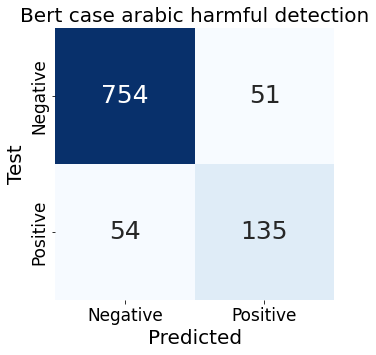

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix(y_test, y_predicted,'Bert case arabic harmful detection')

In [47]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_predicted)
print("Accuracy :%5f" % (accuracy))

Accuracy :0.894366


In [48]:
from sklearn.metrics import f1_score
mic=f1_score(y_test,y_predicted, average='micro')
print("F1-score micro :%5f" % (mic))

F1-score micro :0.894366


In [49]:
from sklearn.metrics import f1_score
mac=f1_score(y_test,y_predicted, average='macro')
print("F1-score macro :%5f" % (mac))

F1-score macro :0.827452


In [50]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_predicted, average='binary')
print(rec)

0.7142857142857143


In [51]:
from sklearn.metrics import precision_score
prec=precision_score(y_test, y_predicted, average='binary')
print(prec)

0.7258064516129032


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


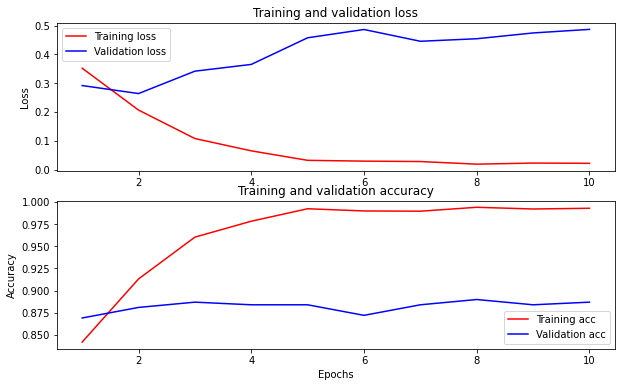

In [52]:
history_dict = history_bert.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [53]:
# Configuration
lr=2e-5
EPOCHS = 10
BATCH_SIZE = 32
MAX_LEN = 150

In [54]:
score = [{'MODEL': 'Bert-base-arabic', 'Accuracy': accuracy,'Precision':prec,'Recall':rec, 'f1-score micro':mic, 'f1-score macro':mac,'epochs':EPOCHS,'batch_size':BATCH_SIZE,'sequence length':MAX_LEN,'learning-rate':'2e-5','Preprocessing':0,'augmentation':0}]
score_f =pd.DataFrame(score)

In [55]:
score_f.to_csv("model_boosted_results.csv")